In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
import os

import ipywidgets as widgets
from IPython.display import display, clear_output

from PIL import Image

pd.options.display.max_columns = None

# df_wyscout_players = pd.read_csv('../../../R/Modulo 2/data/out/Ecuador. Liga Pro_players.csv').reset_index(drop=True)
df_wyscout_players = pd.read_csv('../../../R/Modulo 2/data/out/Colombia. Liga BetPlay_players.csv').reset_index(drop=True)

out_radar = "../../images/Unificar/radar/"


In [20]:
category_metrics_players = pd.DataFrame([
    ## Players
    ("jugador", "Jugador", "General" , "Player"),
    ("equipo", "Equipo", "General" , "Equipment"),
    ("equipo_durante_el_periodo_seleccionado", "Equipo Durante El Periodo Seleccionado", "General" , "Team During The Selected Period"),
    ("posicion_especifica", "Posición Específica", "General" , "Specific Position"),
    ("edad", "Edad", "General" , "Age"),
    ("valor_de_mercado_transfermarkt", "Valor de mercado", "General" , "Market value"),
    ("vencimiento_contrato", "Vencimiento contrato", "General" , "Contract expiration"),
    ("partidos_jugados", "Partidos jugados", "General" , "Matches played"),
    ("minutos", "Minutos", "General" , "Minutes"),
    ("goles", "Goles", "Attack" , "Goals"),
    ("x_g", "xG", "Attack" , "xG"),
    ("asistencias", "Asistencias", "Creativity" , "Assists"),
    ("x_a", "xA", "Creativity" , "xA"),
    ("duelos_90", "Duelos / 90", "Physical" , "Duels / 90"),
    ("duelos_ganados_percent", "Duelos ganados (%)", "Physical" , "Duels won (%)"),
    ("pais_de_nacimiento", "País de nacimiento", "General" , "Country of birth"),
    ("pasaporte", "Pasaporte", "General" , "Passport"),
    ("pie", "Pie dominante", "General" , "Dominant foot"),
    ("altura", "Altura", "General" , "Height"),
    ("peso", "Peso", "General" , "Weight"),
    ("en_prestamo", "En préstamo", "General" , "On loan"),
    ("acciones_defensivas_realizadas_90", "Acciones defensivas / 90", "Defense" , "Defensive actions / 90"),
    ("duelos_defensivos_90", "Duelos defensivos / 90", "Defense" , "Defensive duels / 90"),
    ("duelos_defensivos_ganados_percent", "Duelos defensivos ganados (%)", "Defense" , "Defensive duels won (%)"),
    ("duelos_aereos_en_los_90", "Duelos aéreos / 90", "Defense" , "Aerial Duels / 90"),
    ("duelos_aereos_ganados_percent", "Duelos aéreos ganados (%)", "Defense" , "Aerial duels won (%)"),
    ("entradas_90", "Entradas / 90", "Defense" , "Tackles / 90"),
    ("posesion_conquistada_despues_de_una_entrada", "Posesión tras entrada", "Defense" , "Possession after entry"),
    ("tiros_interceptados_90", "Tiros interceptados / 90", "Defense" , "Intercepted shots / 90"),
    ("interceptaciones_90", "Intercepciones / 90", "Defense" , "Interceptions / 90"),
    ("posesion_conquistada_despues_de_una_interceptacion", "Posesión tras intercepción", "Defense" , "Possession after interception"),
    ("faltas_90", "Faltas / 90", "Discipline" , "Fouls / 90"),
    ("tarjetas_amarillas", "Tarjetas amarillas", "Discipline" , "Yellow cards"),
    ("tarjetas_amarillas_90", "Tarjetas amarillas / 90", "Discipline" , "Yellow cards / 90"),
    ("tarjetas_rojas", "Tarjetas rojas", "Discipline" , "Red cards"),
    ("tarjetas_rojas_90", "Tarjetas rojas / 90", "Discipline" , "Red cards / 90"),
    ("acciones_de_ataque_exitosas_90", "Acciones ofensivas exitosas / 90", "Attack" , "Successful offensive actions / 90"),
    ("goles_90", "Goles / 90", "Attack" , "Goals / 90"),
    ("goles_excepto_los_penaltis", "Goles (sin penaltis)", "Attack" , "Goals (without penalties)"),
    ("goles_excepto_los_penaltis_90", "Goles (sin penaltis) / 90", "Attack" , "Goals (without penalties) / 90"),
    ("x_g_90", "xG / 90", "Attack" , "xG / 90"),
    ("goles_de_cabeza", "Goles de cabeza", "Attack" , "Headed goals"),
    ("goles_de_cabeza_90", "Goles de cabeza / 90", "Attack" , "Headed goals / 90"),
    ("remates", "Remates", "Attack" , "Auctions"),
    ("remates_90", "Remates / 90", "Attack" , "Auctions / 90"),
    ("tiros_a_la_porteria_percent", "Precisión de remates (%)", "Attack" , "Shot accuracy (%)"),
    ("goles_hechos_percent", "Tasa de conversión (%)", "Attack" , "Conversion rate (%)"),
    ("asistencias_90", "Asistencias / 90", "Creativity" , "Assists / 90"),
    ("centros_90", "Centros / 90", "Attack" , "Centers / 90"),
    ("precision_centros_percent", "Precisión centros (%)", "Attack" , "Accuracy centers (%)"),
    ("centros_desde_la_banda_izquierda_90", "Centros izquierda / 90", "Attack" , "Left centers / 90"),
    ("precision_centros_desde_la_banda_izquierda_percent", "Precisión izquierda (%)", "Attack" , "Left accuracy (%)"),
    ("centros_desde_la_banda_derecha_90", "Centros derecha / 90", "Attack" , "Centers right / 90"),
    ("precision_centros_desde_la_banda_derecha_percent", "Precisión derecha (%)", "Attack" , "Right accuracy (%)"),
    ("centros_al_area_pequena_90", "Centros al área pequeña / 90", "Attack" , "Crosses into the small area / 90"),
    ("regates_90", "Regates / 90", "Physical" , "Dribbling / 90"),
    ("regates_realizados_percent", "Éxito en regates (%)", "Physical" , "Dribbling success (%)"),
    ("duelos_atacantes_90", "Duelos ofensivos / 90", "Attack" , "Offensive duels / 90"),
    ("duelos_atacantes_ganados_percent", "Duelos ofensivos ganados (%)", "Attack" , "Offensive duels won (%)"),
    ("toques_en_el_area_de_penalti_90", "Toques en área / 90", "Attack" , "Touches in the area / 90"),
    ("carreras_en_progresion_90", "Carreras progresivas / 90", "Attack" , "Progressive Races / 90"),
    ("aceleraciones_90", "Aceleraciones / 90", "Attack" , "Accelerations / 90"),
    ("pases_recibidos_90", "Pases recibidos / 90", "Physical" , "Passes received / 90"),
    ("pases_largos_recibidos_90", "Pases largos recibidos / 90", "Physical" , "Long passes received / 90"),
    ("faltas_recibidas_90", "Faltas recibidas / 90", "Discipline" , "Fouls received / 90"),
    ("pases_90", "Pases / 90", "Passing" , "Passes / 90"),
    ("precision_pases_percent", "Precisión total pases (%)", "Passing" , "Total pass accuracy (%)"),
    ("pases_hacia_adelante_90", "Pases hacia adelante / 90", "Passing" , "Forward passes / 90"),
    ("precision_pases_hacia_adelante_percent", "Precisión adelante (%)", "Passing" , "Forward Accuracy (%)"),
    ("pases_hacia_atras_90", "Pases hacia atrás / 90", "Passing" , "Back passes / 90"),
    ("precision_pases_hacia_atras_percent", "Precisión atrás (%)", "Passing" , "Backward Accuracy (%)"),
    ("pases_laterales_90", "Pases laterales / 90", "Passing" , "Lateral passes / 90"),
    ("precision_pases_laterales_percent", "Precisión lateral (%)", "Passing" , "Lateral accuracy (%)"),
    ("pases_cortos_medios_90", "Pases cortos/medios / 90", "Passing" , "Short/medium passes / 90"),
    ("precision_pases_cortos_medios_percent", "Precisión cortos/medios (%)", "Passing" , "Short/medium accuracy (%)"),
    ("pases_largos_90", "Pases largos / 90", "Passing" , "Long passes / 90"),
    ("precision_pases_largos_percent", "Precisión pases largos (%)", "Passing" , "Long pass accuracy (%)"),
    ("longitud_media_pases_m", "Longitud media de pases (m)", "Passing" , "Average pass length (m)"),
    ("longitud_media_pases_largos_m", "Longitud media de pases largos (m)", "Passing" , "Average length of long passes (m)"),
    ("x_a_90", "xA / 90", "Creativity" , "xA / 90"),
    ("second_assists_90", "Segunda asistencia / 90", "Creativity" , "Second assist / 90"),
    ("third_assists_90", "Tercera asistencia / 90", "Creativity" , "Third assist / 90"),
    ("desmarques_90", "Desmarques / 90", "Attack" , "Unmarks / 90"),
    ("precision_desmarques_percent", "Precisión desmarques (%)", "Attack" , "Accuracy of runs (%)"),
    ("jugadas_claves_90", "Pases clave / 90", "Creativity" , "Key passes / 90"),
    ("pases_en_el_ultimo_tercio_90", "Pases en tercio final / 90", "Creativity" , "Passes in the final third / 90"),
    ("precision_pases_en_el_ultimo_tercio_percent", "Precisión tercio final (%)", "Creativity" , "Final third accuracy (%)"),
    ("pases_al_area_de_penalti_90", "Pases al área / 90", "Creativity" , "Passes to the area / 90"),
    ("pases_hacia_el_area_pequena_percent", "Precisión área pequeña (%)", "Creativity" , "Small area accuracy (%)"),
    ("pases_en_profundidad_90", "Pases en profundidad / 90", "Creativity" , "Deep passes / 90"),
    ("precision_pases_en_profundidad_percent", "Precisión profundidad (%)", "Creativity" , "Depth accuracy (%)"),
    ("ataque_en_profundidad_90", "Ataques en profundidad / 90", "Attack" , "Deep Attacks / 90"),
    ("centros_desde_el_ultimo_tercio_90", "Centros desde último tercio / 90", "Attack" , "Centers from the final third / 90"),
    ("pases_progresivos_90", "Pases progresivos / 90", "Passing" , "Progressive passes / 90"),
    ("precision_pases_progresivos_percent", "Precisión progresivos (%)", "Passing" , "Progressive accuracy (%)"),
    ("goles_recibidos", "Goles recibidos", "Goalkeeping" , "Goals received"),
    ("goles_recibidos_90", "Goles recibidos / 90", "Goalkeeping" , "Goals received / 90"),
    ("remates_en_contra", "Remates en contra", "Goalkeeping" , "Counterattacks"),
    ("remates_en_contra_90", "Remates en contra / 90", "Goalkeeping" , "Shots against / 90"),
    ("porterias_imbatidas_en_los_90", "Porterías imbatidas / 90", "Goalkeeping" , "Clean sheets / 90"),
    ("paradas_percent", "Porcentaje de paradas", "Goalkeeping" , "Percentage of stops"),
    ("x_g_en_contra", "xG en contra", "Goalkeeping" , "xG against"),
    ("x_g_en_contra_90", "xG en contra / 90", "Goalkeeping" , "xG against / 90"),
    ("goles_evitados", "Goles evitados", "Goalkeeping" , "Goals avoided"),
    ("goles_evitados_90", "Goles evitados / 90", "Goalkeeping" , "Goals avoided / 90"),
    ("pases_hacia_atras_recibidos_del_arquero_90", "Pases del arquero / 90", "Goalkeeping" , "Goalkeeper passes / 90"),
    ("salidas_90", "Salidas / 90", "Goalkeeping" , "Exits / 90"),
    ("tiros_libres_90", "Tiros libres / 90", "Attack" , "Free throws / 90"),
    ("tiros_libres_directos_90", "Tiros libres directos / 90", "Attack" , "Direct free kicks / 90"),
    ("tiros_libres_directos_percent", "Precisión tiros libres (%)", "Attack" , "Free throw accuracy (%)"),
    ("corneres_90", "Corneres / 90", "Attack" , "Corners / 90"),
    ("penaltis_a_favor", "Penaltis a favor", "Attack" , "Penalties in favor"),
    ("penaltis_realizados_percent", "Penaltis convertidos (%)", "Attack" , "Penalties converted (%)")
], columns=["variable", "nombre", "tipo", "name"])

category_metrics_players.head(2)

,variable,nombre,tipo,name
0,jugador,Jugador,General,Player
1,equipo,Equipo,General,Equipment


In [28]:
metricas_por_tipo = {
    # "Delanteros": [
    "Forwards": [
        "goles_90", "x_g_90", "x_a_90", "goles_excepto_los_penaltis_90", "asistencias_90",
        "remates_90", "tiros_a_la_porteria_percent", "toques_en_el_area_de_penalti_90",
        "duelos_atacantes_90", "duelos_atacantes_ganados_percent", "desmarques_90",
        "precision_desmarques_percent", "carreras_en_progresion_90", "pases_al_area_de_penalti_90"
    ],
    # "Extremos": [
    "Wingers": [
        "regates_90", "regates_realizados_percent", "asistencias_90", "x_g_90", "x_a_90",
        "centros_90", "precision_centros_percent", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "duelos_atacantes_90",
        "duelos_atacantes_ganados_percent", "toques_en_el_area_de_penalti_90",
        "carreras_en_progresion_90", "desmarques_90", "pases_al_area_de_penalti_90"
    ],
    # "Mediocampo_Ofensivo": [
    "Attacking_Midfield": [
        "asistencias_90", "x_g_90", "x_a_90", "jugadas_claves_90", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "remates_90", "goles_90",
        "pases_progresivos_90", "pases_al_area_de_penalti_90", "carreras_en_progresion_90",
        "toques_en_el_area_de_penalti_90", "second_assists_90", "pases_en_profundidad_90"
    ],
    # "Mediocampo": [
    "Midfield": [
        "pases_90", "x_g_90", "x_a_90", "precision_pases_percent", "pases_hacia_adelante_90",
        "precision_pases_hacia_adelante_percent", "pases_largos_90", "precision_pases_largos_percent",
        "pases_progresivos_90", "jugadas_claves_90", "duelos_90", "duelos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_interceptacion",
        "faltas_90"
    ],
    # "Mediocampo_Defensivo": [
    "Defensive_Midfield": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_entrada",
        "pases_90", "precision_pases_percent", "pases_hacia_atras_90",
        "precision_pases_hacia_atras_percent", "faltas_90", "tarjetas_amarillas_90",
        "posesion_conquistada_despues_de_una_interceptacion", "pases_laterales_90",
        "precision_pases_laterales_percent"
    ],
    # "Defensas": [
    "Defenders": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "duelos_aereos_en_los_90",
        "duelos_aereos_ganados_percent", "posesion_conquistada_despues_de_una_entrada",
        "tiros_interceptados_90", "pases_90", "precision_pases_percent", "pases_largos_90",
        "precision_pases_largos_percent", "faltas_90", "tarjetas_amarillas_90"
    ],
    # "Arqueros": [
    "Goalkeepers": [
        "goles_recibidos_90", "x_g_en_contra_90", "goles_evitados_90",
        "paradas_percent", "porterias_imbatidas_en_los_90", "remates_en_contra_90",
        "salidas_90", "pases_hacia_atras_recibidos_del_arquero_90",
        "pases_largos_90", "precision_pases_largos_percent"
    ]
}


In [29]:
posiciones_por_categoria = {
    # "Delanteros": ["CF"],
    # "Extremos": ["RW", "RWF", "LW", "LWF"],
    # "Mediocampo_Ofensivo": ["AMF", "RAMF", "LAMF"],
    # "Mediocampo": ["CMF", "RCMF", "LCMF"],
    # "Mediocampo_Defensivo": ["DMF", "RDMF", "LDMF"],
    # "Defensas": ["CB", "RCB", "RB", "RWB", "LCB", "LB", "LWB"],
    # "Arqueros": ["GK"]
    "Forwards": ["CF"],
    "Wingers": ["RW", "RWF", "LW", "LWF"],
    "Attacking_Midfield": ["AMF", "RAMF", "LAMF"],
    "Midfield": ["CMF", "RCMF", "LCMF"],
    "Defensive_Midfield": ["DMF", "RDMF", "LDMF"],
    "Defenders": ["CB", "RCB", "RB", "RWB", "LCB", "LB", "LWB"],
    "Goalkeepers": ["GK"]
}

In [92]:
# --- 1. Funciones de apoyo ---
def obtener_categoria(posicion, posiciones_por_categoria):
    """Retorna la categoría de posición (Delanteros, Defensas, etc.) según el código de posición."""
    for categoria, posiciones in posiciones_por_categoria.items():
        if posicion in posiciones:
            return categoria
    return None

# def graficar_jugador_vs_promedio(df, jugador, posiciones_por_categoria, metricas_por_tipo, category_metrics_players):
#     """Genera el radar para un jugador vs promedio de su categoría de posición."""
#     # Obtener posición y categoría
#     pos_jugador = df.loc[df['Player'] == jugador, 'posicion_especifica'].values[0]
#     categoria = obtener_categoria(pos_jugador, posiciones_por_categoria)
#     if not categoria:
#         print(f"⚠ {jugador} - Posición {pos_jugador} sin categoría definida")
#         return

#     # Filtrar métricas según categoría
#     metricas = metricas_por_tipo[categoria]
    
#     # Calcular promedio de la categoría (excluyendo al jugador para evitar inflar stats)
#     df_categoria = df[df['posicion_especifica'].isin(posiciones_por_categoria[categoria])]
#     promedio = df_categoria[metricas].mean()

#     # Crear dataframe comparativo
#     df_comp = pd.DataFrame([
#         [jugador] + df.loc[df['Player'] == jugador, metricas].iloc[0].tolist(),
#         ["Promedio " + categoria] + promedio.tolist()
#     ], columns=["Player"] + metricas)

#     # Renombrar columnas a nombres legibles
#     rename_dict = dict(zip(category_metrics_players["variable"], category_metrics_players["name"]))
#     df_comp.rename(columns=rename_dict, inplace=True)

#     # Parámetros radar
#     params = df_comp.columns[1:]
#     ranges = []
#     for p in params:
#         a = df_comp[p].min() * 0.75
#         b = df_comp[p].max() * 1.25
#         ranges.append((a, b))

#     values = [df_comp.iloc[0, 1:].tolist(), df_comp.iloc[1, 1:].tolist()]

#     title = dict(
#         title_name=jugador,
#         title_color='red',
#         subtitle_name=categoria,
#         subtitle_color='red',
#         title_name_2="Avg - " + categoria,
#         title_color_2='blue',
#         subtitle_name_2=categoria,
#         subtitle_color_2='blue',
#         title_fontsize=18,
#         subtitle_fontsize=15
#     )

#     params = [
#     s.split(' ', 1)[0] + '\n' + s.split(' ', 1)[1] if ' ' in s else s
#     for s in params
#     ]   

#     radar = Radar()
#     fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
#                                radar_color=['#B6282F', '#344D94'],
#                                title=title, endnote="", compare=True)
#     return fig



def graficar_jugador_vs_promedio(df, jugador, equipo, posiciones_por_categoria, metricas_por_tipo, category_metrics_players):
    row_jugador = df[(df['Player'] == jugador) & (df['equipo'] == equipo)].iloc[0]
    categoria = row_jugador['posicion_categoria']   # ✅ usamos la categoría ya calculada
    
    metricas = metricas_por_tipo[categoria]

    # ✅ promedio sobre todos los jugadores de la misma categoría
    df_categoria = df[df['posicion_categoria'] == categoria]
    promedio = df_categoria[metricas].mean()

    stats_jugador = row_jugador[metricas]

    # Crear dataframe comparativo
    df_comp = pd.DataFrame([
        [f"{jugador} ({equipo})"] + stats_jugador.tolist(),
        ["Promedio " + categoria] + promedio.tolist()
    ], columns=["Player"] + metricas)

    # Renombrar columnas a nombres legibles
    rename_dict = dict(zip(category_metrics_players["variable"], category_metrics_players["name"]))
    df_comp.rename(columns=rename_dict, inplace=True)

    # Preparar parámetros del radar
    params = df_comp.columns[1:]
    ranges = []
    for p in params:
        a = df_comp[p].min() * 0.75
        b = df_comp[p].max() * 1.25
        ranges.append((a, b))

    values = [df_comp.iloc[0, 1:].tolist(), df_comp.iloc[1, 1:].tolist()]

    title = dict(
        # title_name=f"{jugador} ({equipo})",
        title_name=f"{jugador}",
        title_color='red',
        subtitle_name=categoria,
        subtitle_color='red',
        title_name_2="Avg - " + categoria,
        title_color_2='blue',
        subtitle_name_2=categoria,
        subtitle_color_2='blue',
        title_fontsize=18,
        subtitle_fontsize=15
    )

    # Ajustar nombres de parámetros
    params = [s.split(' ', 1)[0] + '\n' + s.split(' ', 1)[1] if ' ' in s else s for s in params]

    radar = Radar()
    fig, ax = radar.plot_radar(
        ranges=ranges, params=params, values=values,
        radar_color=['#B6282F', '#344D94'],
        title=title, endnote="", compare=True
    )
    return fig


In [94]:
df = df_wyscout_players.copy()
df = df.rename(columns = {
    "jugador": "Player",
    "asistencias_90_48": "asistencias_90",})
df['Player'] = df['Player'].str.split('//',expand=True)[0]
df.Player.unique()

# df = df[df['equipo']=='América de Cali']
df = df.fillna(0)

df["posicion_especifica"] = (
    df["posicion_especifica"]
    .astype(str)                # asegurar string
    .str.replace(",", "", regex=False)   # quitar comas
    .str.strip()                # quitar espacios
    .str.upper()                # todo a mayúsculas
    .str[:3]                    # limitar a 3 caracteres
)

# Normalización manual de códigos (igual que en R con recode)
map_posiciones = {
    "LCM": "LCMF",
    "RCM": "RCMF",
    "LAM": "LAMF",
    "RAM": "RAMF",
    "RDM": "RDMF",
    "LDM": "LDMF",
    "CF ": "CF",
    "LW ": "LW",
    "RW ": "RW",
    "LB ": "LB",
    "RB ": "RB",
    "CB ": "CB",
}
df["posicion_especifica"] = df["posicion_especifica"].replace(map_posiciones)

# Crear columna 'posicion_categoria' en df
df["posicion_categoria"] = df["posicion_especifica"].apply(
    lambda pos: obtener_categoria(pos, posiciones_por_categoria)
)

df_america = df[df['equipo'] == 'América de Cali'] 
# df_america = df_america[df_america['Player'].isin(['J. Quintero', 'L. Ramos'])]


In [95]:
df_america.head(2)

,Player,equipo,equipo_durante_el_periodo_seleccionado,posicion_especifica,edad,valor_de_mercado_transfermarkt,vencimiento_contrato,partidos_jugados,minutos,goles,x_g,asistencias,x_a,duelos_90,duelos_ganados_percent,pais_de_nacimiento,pasaporte,pie,altura,peso,en_prestamo,acciones_defensivas_realizadas_90,duelos_defensivos_90,duelos_defensivos_ganados_percent,duelos_aereos_en_los_90,duelos_aereos_ganados_percent,entradas_90,posesion_conquistada_despues_de_una_entrada,tiros_interceptados_90,interceptaciones_90,posesion_conquistada_despues_de_una_interceptacion,faltas_90,tarjetas_amarillas,tarjetas_amarillas_90,tarjetas_rojas,tarjetas_rojas_90,acciones_de_ataque_exitosas_90,goles_90,goles_excepto_los_penaltis,goles_excepto_los_penaltis_90,x_g_90,goles_de_cabeza,goles_de_cabeza_90,remates,remates_90,tiros_a_la_porteria_percent,goles_hechos_percent,centros_90,precision_centros_percent,centros_desde_la_banda_izquierda_90,precision_centros_desde_la_banda_izquierda_percent,centros_desde_la_banda_derecha_90,precision_centros_desde_la_banda_derecha_percent,centros_al_area_pequena_90,regates_90,regates_realizados_percent,duelos_atacantes_90,duelos_atacantes_ganados_percent,toques_en_el_area_de_penalti_90,carreras_en_progresion_90,aceleraciones_90,pases_recibidos_90,pases_largos_recibidos_90,faltas_recibidas_90,pases_90,precision_pases_percent,pases_hacia_adelante_90,precision_pases_hacia_adelante_percent,pases_hacia_atras_90,precision_pases_hacia_atras_percent,pases_laterales_90,precision_pases_laterales_percent,pases_cortos_medios_90,precision_pases_cortos_medios_percent,pases_largos_90,precision_pases_largos_percent,longitud_media_pases_m,longitud_media_pases_largos_m,x_a_90,asistencias_90,second_assists_90,third_assists_90,desmarques_90,precision_desmarques_percent,jugadas_claves_90,pases_en_el_ultimo_tercio_90,precision_pases_en_el_ultimo_tercio_percent,pases_al_area_de_penalti_90,pases_hacia_el_area_pequena_percent,pases_en_profundidad_90,precision_pases_en_profundidad_percent,ataque_en_profundidad_90,centros_desde_el_ultimo_tercio_90,pases_progresivos_90,precision_pases_progresivos_percent,goles_recibidos,goles_recibidos_90,remates_en_contra,remates_en_contra_90,porterias_imbatidas_en_los_90,paradas_percent,x_g_en_contra,x_g_en_contra_90,goles_evitados,goles_evitados_90,pases_hacia_atras_recibidos_del_arquero_90,salidas_90,tiros_libres_90,tiros_libres_directos_90,tiros_libres_directos_percent,corneres_90,penaltis_a_favor,penaltis_realizados_percent,Country,Code,logo_team,categoria,archivo_png,posicion_categoria
16,J. Soto,América de Cali,América de Cali,GK,32.0,550000.0,2026-06-30,39,3833,0,0.00,1,0.52,0.59,80.00,Colombia,Colombia,derecho,187,82,no,1.36,0.02,100.00,0.35,86.67,0.00,0.00,0.0,1.34,2.05,0.00,3,0.07,0,0.0,0.0,0.00,0,0.00,0.00,0,0.0,0,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,100.0,0.00,0.02,0.00,10.57,0.23,0.12,18.15,79.04,12.35,71.48,0.02,0.00,5.42,97.40,9.84,96.42,8.24,58.69,37.77,54.06,0.01,0.05,0.00,0.00,0.02,0.00,0.02,3.24,47.83,0.35,20.0,0.14,33.33,0.09,0.00,6.32,72.49,32,0.75,128,3.01,16,75.0,31.83,0.75,-0.17,-0.004,0.00,1.67,0.00,0.00,0.0,0.00,0,0,Colombia,AME,COL_AME,Goalkeepers,GOALKEEPERS_AMÉRICA_DE_CALI_J_SOTO.png,Goalkeepers
47,S. Navarro,América de Cali,América de Cali,AMF,25.0,600000.0,0,41,3139,2,2.29,4,4.19,12.62,48.41,Colombia,Colombia,derecho,187,74,si,4.90,4.19,59.59,2.12,41.89,0.32,0.52,0.2,2.09,3.44,1.15,6,0.17,0,0.0,1.2,0.06,2,0.06,0.07,0,0.0,48,1.38,20.83,4.167,0.8,32.14,0.37,38.46,0.43,26.67,0.11,1.29,48.89,4.73,40.0,1.63,0.83,0.03,27.78,1.03,1.18,37.19,88.28,10.38,80.11,7.43,94.98,13.22,89.37,33.17,91.53,3.21,68.75,17.96,30.79,0.12,0.97,0.03,0.09,0.09,33.33,0.46,6.19,81.48,1.43,46.0,0.26,11.11,0.80,0.34,5.79,81.68,0,0.00,0,0.00,0,0.0,0.00,0.00,0.00,0.000,0.26,0.00,0.29,0.09,0.0,0.69,0,0,Colombia,AME,COL_AME,Attacking Midfield,ATTACKING_MIDFIELD_AMÉRICA_DE_CALI_S_NAVARRO.png,Attacking_Midfield


In [ ]:
# for jugador in df['Player'].unique():
# for jugador in df_america['Player'].unique():
#     # Filtramos la fila del jugador
#     # row = df[df['Player'] == jugador].iloc[0]
#     row = df_america[df_america['Player'] == jugador].iloc[0]  # ✅ jugador ya filtrado por América
    
#     posicion = row['posicion_especifica']   # o el nombre real de la columna en tu df
#     equipo = row['equipo']

#     # Buscar la categoría de posición
#     categoria = None
#     for cat, posiciones in posiciones_por_categoria.items():
#         if posicion in posiciones:
#             categoria = cat.upper()
#             break
    
#     # Normalizar nombre de archivo
#     jugador_str = jugador.upper().replace(' ', '_')
#     jugador_str = jugador_str.replace(' ', '_').replace('.', '')
#     equipo_str = equipo.upper().replace(' ', '_')
    
#     nombre_archivo = f"{categoria}_{equipo_str}_{jugador_str}.png"

#     fig = graficar_jugador_vs_promedio(
#         df=df,
#         jugador=jugador,
#         posiciones_por_categoria=posiciones_por_categoria,
#         metricas_por_tipo=metricas_por_tipo,
#         category_metrics_players=category_metrics_players
#     )
#     if fig:
#         fig.set_size_inches(19.39, 8.91)  # Ajusta tamaño en pulgadas
#         fig.savefig(
#             # nombre_archivo,
#             os.path.join( out_radar, nombre_archivo),  # ✅ ruta completa
#             dpi=300,
#             bbox_inches='tight'  # recorta espacios en blanco
#         )                                                                                                                                                               

# ✅ Solo seleccionamos los jugadores del equipo en el loop

for jugador in df_america['Player'].unique():
    row = df_america[df_america['Player'] == jugador].iloc[0]  # ✅ jugador ya filtrado por América
    posicion = row['posicion_especifica']
    equipo = row['equipo']

    # Buscar la categoría
    categoria = None
    for cat, posiciones in posiciones_por_categoria.items():
        if posicion in posiciones:
            categoria = cat.upper()
            break

    # Normalizar nombre archivo
    jugador_str = jugador.upper().replace(' ', '_').replace('.', '')
    equipo_str = equipo.upper().replace(' ', '_')
    nombre_archivo = f"{categoria}_{equipo_str}_{jugador_str}.png"

    # ✅ pasamos jugador + equipo
    fig = graficar_jugador_vs_promedio(
        df=df,
        jugador=jugador,
        equipo=equipo,
        posiciones_por_categoria=posiciones_por_categoria,
        metricas_por_tipo=metricas_por_tipo,
        category_metrics_players=category_metrics_players
    )
    if fig:
        fig.set_size_inches(19.39, 8.91)
        fig.savefig(os.path.join(out_radar, nombre_archivo),
                    dpi=300, bbox_inches='tight')


In [97]:
# Carpetas
carpeta_plot = "../../images/Unificar/tables/"
carpeta_radar = "../../images/Unificar/radar/"

# Listar archivos PNG (sin rutas completas)
archivos_plot = sorted([f for f in os.listdir(carpeta_plot) if f.lower().endswith(".png")])
archivos_radar = sorted([f for f in os.listdir(carpeta_radar) if f.lower().endswith(".png")])

In [99]:
# Archivos que están en plot pero no en radar
solo_plot = sorted(set(archivos_plot) - set(archivos_radar))

# Archivos que están en radar pero no en plot
solo_radar = sorted(set(archivos_radar) - set(archivos_plot))

if solo_plot:
    print("⚠️ En carpeta_plot y no en carpeta_radar:")
    for f in solo_plot:
        print("   ", f)

if solo_radar:
    print("⚠️ En carpeta_radar y no en carpeta_plot:")
    for f in solo_radar:
        print("   ", f)

if not solo_plot and not solo_radar:
    print("✅ Todos los nombres hacen match")


⚠️ En carpeta_radar y no en carpeta_plot:
    FORWARDS_AMÉRICA_DE_CALI_D_HERNÁNDEZ_PEREIRA.png


In [ ]:
# Filtrar solo los que están en ambas carpetas
nombres_comunes = sorted(set(archivos_plot) & set(archivos_radar))

imagenes = []
for nombre in nombres_comunes:
    # Abrir imagen plot
    img_plot = Image.open(os.path.join(carpeta_plot, nombre)).convert("RGB")
    # Abrir imagen radar
    img_radar = Image.open(os.path.join(carpeta_radar, nombre)).convert("RGB")
    # Añadir ambas a la lista en orden
    imagenes.append(img_plot)
    imagenes.append(img_radar)

# Guardar como PDF
if imagenes:
    imagenes[0].save(
        "Report.pdf", save_all=True, append_images=imagenes[1:]
    )
    print(f"✅ PDF creado con {len(imagenes)} páginas")
else:
    print("⚠️ No se encontraron coincidencias de nombres entre las carpetas")

✅ PDF creado con 54 páginas


: 

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

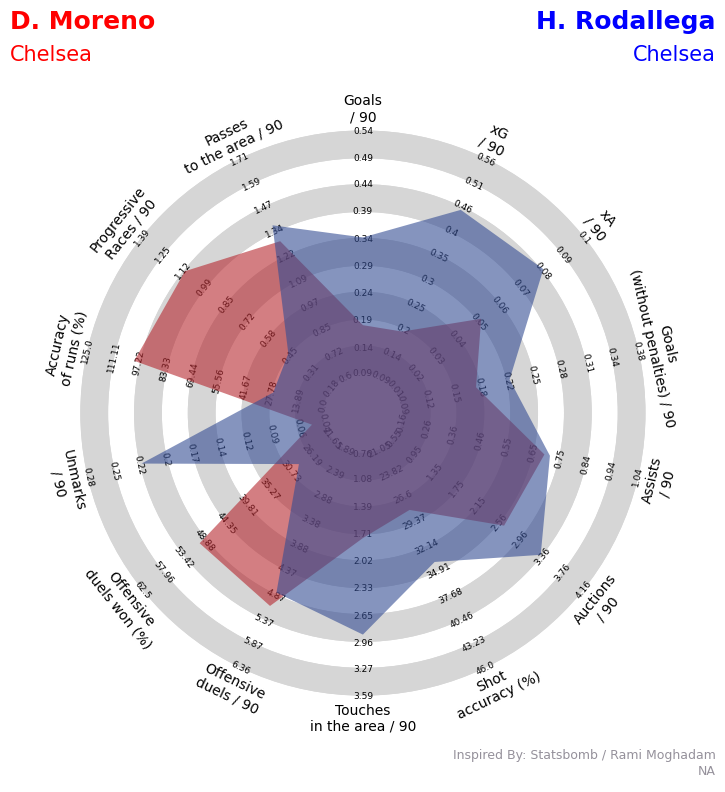

In [12]:
df = df_wyscout_players.copy()
df = df.rename(columns = {
    "jugador": "Player",
    "asistencias_90_48": "asistencias_90",})
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
# df.Player.unique()

player1 = 'D. Moreno'
player2 = 'H. Rodallega'

df = df[(df['Player']== player1) | (df['Player']==player2)].reset_index()
df = df[["Player"] + metricas_por_tipo["Forwards"]]
# df = df[["Player"] + metricas_por_tipo["Delanteros"]]
# Crear el diccionario de renombramiento desde variable → name
rename_dict = dict(zip(category_metrics_players["variable"], category_metrics_players["name"]))

# Renombrar columnas en df2
df.rename(columns=rename_dict, inplace=True)

df.head(2)
#get parameters
params = list(df.columns)
params = params[1:]
params
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == player1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == player2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]
#title 

title = dict(
    title_name=player1,
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name_2=player2,
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@mckayjohns/ndata via FBREF / Statsbomb'
params = [
    s.split(' ', 1)[0] + '\n' + s.split(' ', 1)[1] if ' ' in s else s
    for s in params
]


## endnote 
endnote = "NA"

## instantiate object
radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, endnote=endnote,
                           compare=True)